In [10]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [11]:
DATA_PATH = 'mfcc_extract_(10,000-3sec).json'

In [12]:
def load_data(data_path):
    with open(data_path, "r") as filepath:
        data = json.load(filepath)

    X = np.array(data["mfcc"])
    y = np.array(data["genre_id"])
    return X, y

In [13]:
def save_history(history, title):
    #Save's plot for accuracy-loss for training-validation sets across epochs
    
    fig, axs = plt.subplots(2, figsize=(20, 15))

    # create accuracy sublpot
    axs[0].plot(history.history['acc'], label='Train accuracy')
    axs[0].plot(history.history['val_acc'], label='Test accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='lower right')
    axs[0].set_title('Accuracy eval')

    # create error sublpot
    axs[1].plot(history.history['loss'], label='train error')
    axs[1].plot(history.history['val_loss'], label='test error')
    axs[1].set_ylabel('Error')
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc='upper right')
    axs[1].set_title('Error eval')
    
    plt.savefig(title)

In [14]:
def plot_history(history):
    #Plots accuracy-loss for training-validation sets across epochs

    fig, axs = plt.subplots(2, figsize=(20, 15))

    # create accuracy sublpot
    axs[0].plot(history.history['acc'], label='Train accuracy')
    axs[0].plot(history.history['val_acc'], label='Test accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='lower right')
    axs[0].set_title('Accuracy eval')

    # create error sublpot
    axs[1].plot(history.history['loss'], label='train error')
    axs[1].plot(history.history['val_loss'], label='test error')
    axs[1].set_ylabel('Error')
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc='upper right')
    axs[1].set_title('Error eval')

    plt.show()

In [15]:
def prepare_datasets(test_size, validation_size):
    #Loads and splits data into train, validation and test sets
    
    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [28]:
def build_model(input_shape):
    #Generates a CNN model
    
    # build network topology
    model = keras.Sequential()

    # 1st conv set
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.01), input_shape=input_shape))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.Dropout(0.2))

    # 2nd conv set
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.Dropout(0.25))

    # 3rd conv set
    model.add(keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.Dropout(0.3))

    # flatten output
    model.add(keras.layers.Flatten())
    
    # 1st dense layer
    model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(keras.layers.Dropout(0.3))
    
    # 2nd dense layer
    model.add(keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(keras.layers.Dropout(0.2))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [17]:
def predict(model, X, y):
    #Predict a sample using the given model
    
    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 259, 13, 32)       320       
_________________________________________________________________
batch_normalization_31 (Batc (None, 259, 13, 32)       128       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 259, 13, 32)       9248      
_________________________________________________________________
batch_normalization_32 (Batc (None, 259, 13, 32)       128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 130, 7, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 130, 7, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 130, 7, 64)       

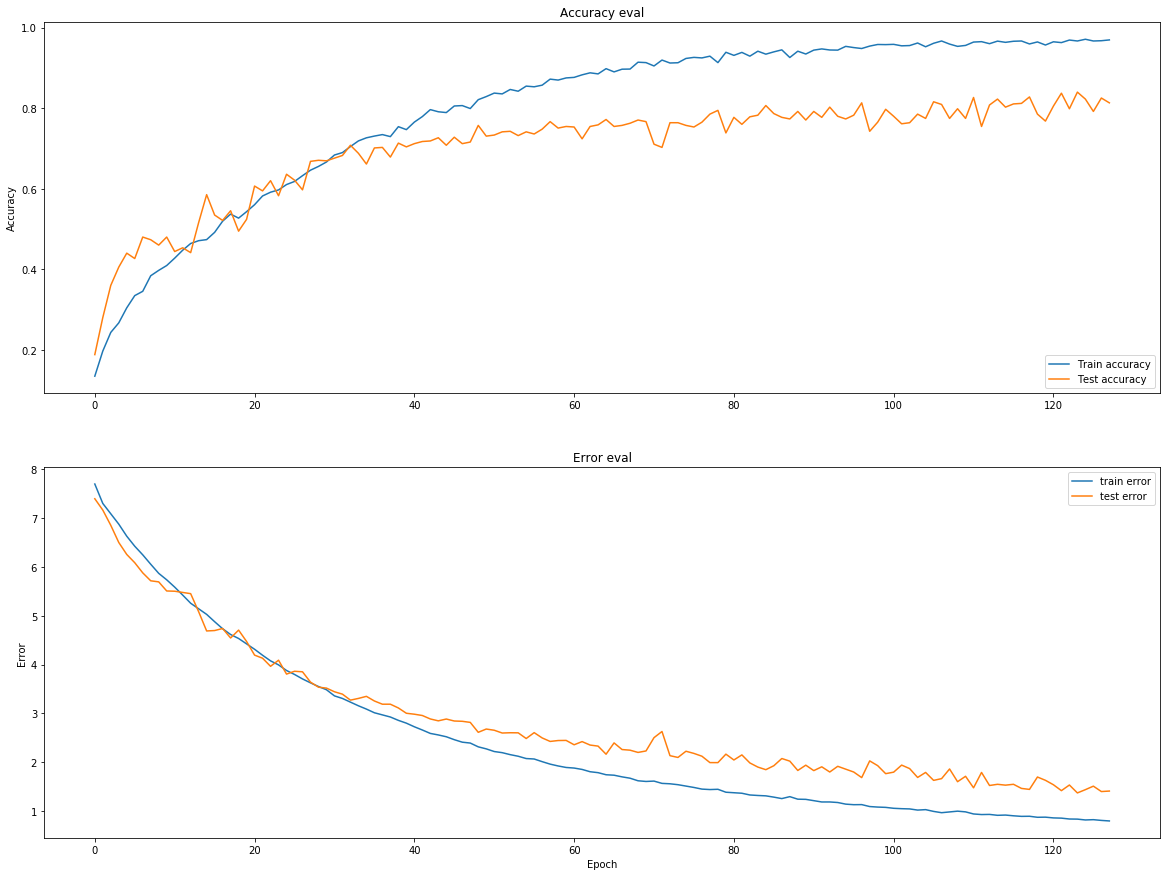

1250/1250 - 5s - loss: 1.3280 - acc: 0.8344

Test accuracy: 0.8344
Target: 7, Predicted label: [1]


In [29]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=128)

# plot accuracy/error for training and validation
plot_history(history)

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

# predict sample
predict(model, X_to_predict, y_to_predict)

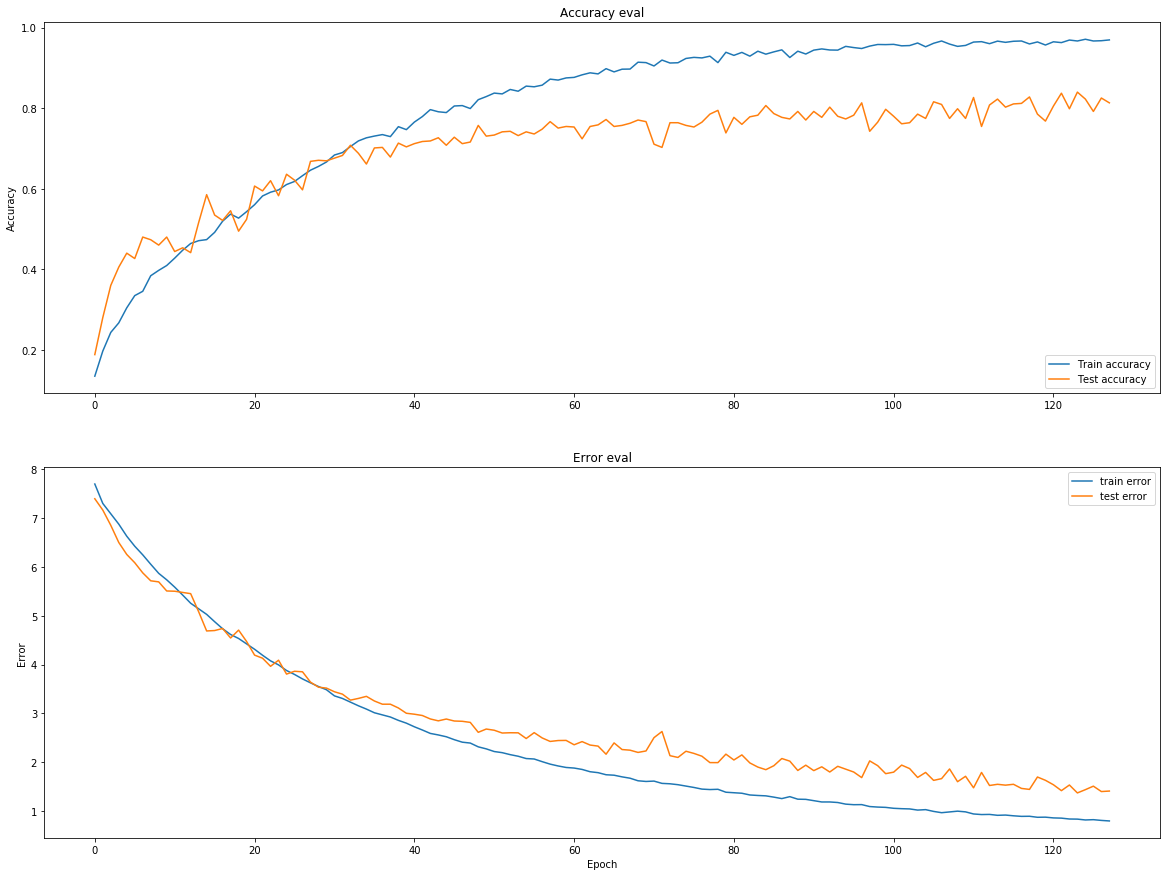

In [33]:
plot_history(history)

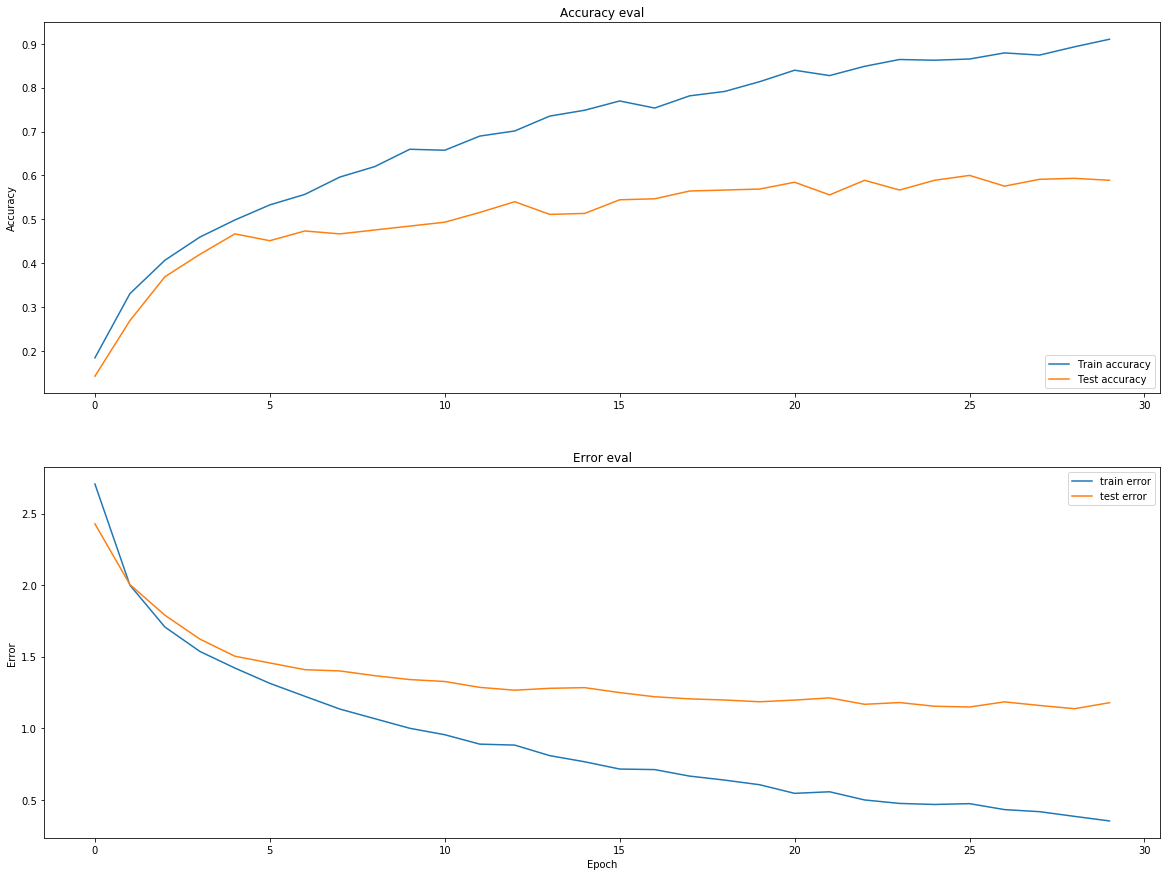

In [42]:
save_history(history, 'CNN-10s_MFCC.png')

In [59]:
model.save('CNN_2.h5')

In [31]:
model_json = model.to_json()
with open('CNN_10,000_128E_0.8133-valacc(3).json', 'w') as fp:
    fp.write(model_json)
model.save_weights('CNN-0.8133.h5')

In [40]:
len(X_test[100])

In [42]:
with open(DATA_PATH, "r") as filepath:
    data = json.load(filepath)

test = np.array(data["mfcc"])

In [57]:
X_test[100].shape

(259, 13, 1)

In [56]:
p = model.predict(test)

ValueError: Error when checking input: expected conv2d_31_input to have 4 dimensions, but got array with shape (259, 13, 1)